<a href="https://colab.research.google.com/github/alexhu20/dolly-co-pilot/blob/master/rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

## **Getting started**
</div>

Setting up the environments for rag training install dependencies

In [3]:
pip install -r requirement.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

Load example data

In [47]:
import logging
import os
import json
from dataclasses import dataclass, field
from typing import Optional
from functools import partial

import datasets
from datasets import load_dataset

logger = logging.getLogger(__name__)
logger.setLevel(20)


raw_dataset = load_dataset("csv" , data_files="chatgpt_training_data.csv")

  0%|          | 0/1 [00:00<?, ?it/s]

Data pre-processing:
* Initialize the model
* Tokenize the input

In [53]:
import transformers
from transformers import (
    TrainingArguments,
    default_data_collator,
    RagSequenceForGeneration,
    RagTokenizer,
    RagConfig,
)

tokenizer = RagTokenizer.from_pretrained('facebook/rag-sequence-nq')

question_column = raw_dataset["train"].column_names[0]
context_column = raw_dataset["train"].column_names[1]
answers_column = raw_dataset["train"].column_names[2]

def preprocess_data(examples):
  examples[question_column] = [q.lstrip() for q in examples[question_column]]

  tokenzied_data = tokenizer(examples[question_column], examples[context_column], trucation=True, max_length=512, padding="max_length", return_tensors="pt")

  logger.info(tokenzied_data)

dataset_train = raw_dataset["train"]
dataset_train.map(preprocess_data, batched=True)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizerFast'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'BartTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called fr

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 24>:24                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:578 in wrapper                 │
│                                                                                                  │
│    575 │   │   else:                                                                             │
│    576 │   │   │   self: "Dataset" = kwargs.pop("self")                                          │
│    577 │   │   # apply actual function                                                           │
│ ❱  578 │   │   out: Union["Dataset", "DatasetDict"] = func(self, *args, **kwargs)                │
│    579 │   │   datasets: List["Dataset"] = list(out.values()) if isinstance(out, dict) else [ou  │
│    580 │   │   for dataset in datasets:                                                          │
│    581 │   │   │   # Remove task templates if a column mapping of the template is no longer val  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:543 in wrapper                 │
│                                                                                                  │
│    540 │   │   │   "output_all_columns": self._output_all_columns,                               │
│    541 │   │   }                                                                                 │
│    542 │   │   # apply actual function                                                           │
│ ❱  543 │   │   out: Union["Dataset", "DatasetDict"] = func(self, *args, **kwargs)                │
│    544 │   │   datasets: List["Dataset"] = list(out.values()) if isinstance(out, dict) else [ou  │
│    545 │   │   # re-apply format to the output                                                   │
│    546 │   │   for dataset in datasets:                                                          │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:3073 in map                    │
│                                                                                                  │
│   3070 │   │   │   │   │   leave=False,                                                          │
│   3071 │   │   │   │   │   desc=desc or "Map",                                                   │
│   3072 │   │   │   │   ) as pbar:                                                                │
│ ❱ 3073 │   │   │   │   │   for rank, done, content in Dataset._map_single(**dataset_kwargs):     │
│   3074 │   │   │   │   │   │   if done:                                                          │
│   3075 │   │   │   │   │   │   │   shards_done += 1                                              │
│   3076 │   │   │   │   │   │   │   logger.debug(f"Finished processing shard number {rank} of {n  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:3449 in _map_single            │
│                                                                                                  │
│   3446 │   │   │   │   │   │   │   range(*(slice(i, i + batch_size).indices(shard.num_rows)))    │
│   3447 │   │   │   │   │   │   )  # Something simpler?                                           │
│   3448 │   │   │   │   │   │   try:                                                              │
│ ❱ 3449 │   │   │   │   │   │   │   batch = apply_function_on_filtered_inputs(                    │
│   3450 │   │   │   │   │   │   │   │   batch,              

Load pre-tained model

In [33]:
import transformers
from transformers import (
    TrainingArguments,
    default_data_collator,
    RagSequenceForGeneration,
    RagTokenizer,
    RagConfig,
)


model_config = RagConfig.from_pretrained('facebook/rag-sequence-nq')
model = RagSequenceForGeneration.from_pretrained('facebook/rag-sequence-nq', config=model_config)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizerFast'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'BartTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called fr

Some weights of the model checkpoint at facebook/rag-sequence-nq were not used when initializing RagSequenceForGeneration: ['rag.question_encoder.question_encoder.bert_model.pooler.dense.weight', 'rag.question_encoder.question_encoder.bert_model.pooler.dense.bias']
- This IS expected if you are initializing RagSequenceForGeneration from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RagSequenceForGeneration from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

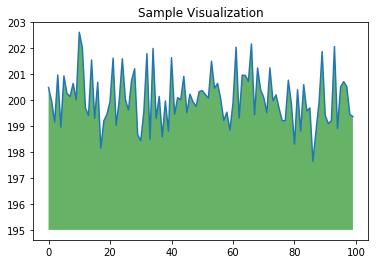

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
